In [1]:
%load_ext autoreload

In [3]:
import pandas as pd
import os
from regression_shap_mmp.ML.utils_shap import get_shap_bit_values
import seaborn as sns
sns.set_theme(style="whitegrid")
%autoreload 2

In [4]:
results_path = './regression_shap_mmp/ECFP4/regression/'

In [5]:
df_shap_loaded_all = pd.read_pickle(os.path.join(results_path, f'df_shap.pkl'))
display(df_shap_loaded_all)

trial algorithm       split      explainer            cid  \
0        0       SVR      Random          SVETA   CHEMBL472581   
1        0       SVR      Random          SVETA   CHEMBL509914   
2        0       SVR      Random          SVETA  CHEMBL4541014   
3        0       SVR      Random          SVETA   CHEMBL128987   
4        0       SVR      Random          SVETA   CHEMBL447223   
..     ...       ...         ...            ...            ...   
475      9       RFR  Stratified  TreeExplainer  CHEMBL1766496   
476      9       RFR  Stratified  TreeExplainer  CHEMBL4647072   
477      9       RFR  Stratified  TreeExplainer  CHEMBL1784169   
478      9       RFR  Stratified  TreeExplainer  CHEMBL3086677   
479      9       RFR  Stratified  TreeExplainer  CHEMBL5081438   

                                                smiles  target ID  \
0    CS(=O)(=O)CCNCc1nc(-c2ccc3ncnc(Nc4ccc5c(cnn5Cc...        203   
1       O=C(C=Cc1ccccc1)Cc1cc2c(Nc3cccc(Br)c3)ncnc2cn1        203   
2          COc1cc(Nc2ncnc3cc(-c4ccccc4)sc23)cc(OC)c1OC        203   
3             Brc1cccc(Nc2ncnc3cc(NCCN4CCOCC4)ncc23)c1        203   
4            C=CC(=O)Nc1ccc2ncnc(Cc3ccc(F)c(Cl)c3)c2c1        203   
..                                                 ...        ...   
475      Cn1c(=O)c(Cc2ccc(F)cc2F)cc2cnc(NC3CCOCC3)nc21        260   
476       c1ccc2cc(-c3nnc(N4CCNCC4)cc3-c3ccncc3)ccc2c1        260   
477  Cc1nc(CNC(=O)c2ccc(-c3cc(C(=O)NC4CC4)cc(F)c3C)...        260   
478  O=C1c2cc(OCCC3CCOCC3)ccc2COc2cc(Nc3ccc(F)cc3F)...        260   
479  COC(=O)CCCNC(=O)c1ccc2c(c1)C(=O)c1ccc(Nc3ccc(F...        260   

     experimental  prediction  expected_value       mae  analog_series_id  \
0        7.150028    7.250393        6.646533  0.100365               305   
1        8.040005    8.140346        6.646533  0.100341                27   
2        7.638272    7.538456        6.646533  0.099816               253   
3        8.489991    8.561117        6.646533  0.071125                17   
4        9.119987    9.183653        6.646533  0.063666                80   
..            ...         ...             ...       ...               ...   
475      7.397940    7.804251        7.365917  0.406311               283   
476      6.795880    6.829682        7.365917  0.033802               142   
477      7.100015    6.861094        7.365917  0.238922               184   
478      6.770636    6.492897        7.365917  0.277739                28   
479      8.468521    8.382190        7.365917  0.086331                46   

     mmp_id  similarity      dPot  \
0       166    0.812500  0.001286   
1       125    0.789474  1.120014   
2         0    0.800000  1.151490   
3       250    0.881356  0.219966   
4       194    0.661017  0.030041   
..      ...         ...       ...   
475     294    0.558824  0.279841   
476     314    0.755102  0.157608   
477     161    0.655738  0.600019   
478     253    0.704225  0.886942   
479     264    0.591549  1.547702   

                                           shap_values  \
0    [0.0, 0.032219119696185815, -0.055681158185522...   
1    [0.0, 0.021741757320681867, -0.091442926251187...   
2    [0.0, 0.04179085647819404, -0.0580110349601591...   
3    [0.0, 0.03716784869633809, -0.0843523984224269...   
4    [0.0, 0.05648243399732695, -0.1151572299096595...   
..                                                 ...   
475  [0.0, -0.002593746648617525, -2.67996651018620...   
476  [0.0, -0.002915379880214459, 1.434880119631998...   
477  [0.0, -0.0036892747342790245, 8.46013695991132...   
478  [0.0, -0.0037749859997347813, -1.2529271480161...   
479  [0.0, -0.0022593092225179135, 0.00014336155290...   

                                           fingerprint  conf_expected  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       7.250393   
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       8.140346   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       7.538456   
3    [0, 0, 0, 0, 0, 0, 

In [6]:
df_shap_loaded_all.rename(columns={'train_test': 'Set'}, inplace=True)
df_shap_loaded_all['Set'] = df_shap_loaded_all['Set'].replace({'test': 'Test', 'train': 'Train'})
display(df_shap_loaded_all)

trial algorithm       split      explainer            cid  \
0        0       SVR      Random          SVETA   CHEMBL472581   
1        0       SVR      Random          SVETA   CHEMBL509914   
2        0       SVR      Random          SVETA  CHEMBL4541014   
3        0       SVR      Random          SVETA   CHEMBL128987   
4        0       SVR      Random          SVETA   CHEMBL447223   
..     ...       ...         ...            ...            ...   
475      9       RFR  Stratified  TreeExplainer  CHEMBL1766496   
476      9       RFR  Stratified  TreeExplainer  CHEMBL4647072   
477      9       RFR  Stratified  TreeExplainer  CHEMBL1784169   
478      9       RFR  Stratified  TreeExplainer  CHEMBL3086677   
479      9       RFR  Stratified  TreeExplainer  CHEMBL5081438   

                                                smiles  target ID  \
0    CS(=O)(=O)CCNCc1nc(-c2ccc3ncnc(Nc4ccc5c(cnn5Cc...        203   
1       O=C(C=Cc1ccccc1)Cc1cc2c(Nc3cccc(Br)c3)ncnc2cn1        203   
2          COc1cc(Nc2ncnc3cc(-c4ccccc4)sc23)cc(OC)c1OC        203   
3             Brc1cccc(Nc2ncnc3cc(NCCN4CCOCC4)ncc23)c1        203   
4            C=CC(=O)Nc1ccc2ncnc(Cc3ccc(F)c(Cl)c3)c2c1        203   
..                                                 ...        ...   
475      Cn1c(=O)c(Cc2ccc(F)cc2F)cc2cnc(NC3CCOCC3)nc21        260   
476       c1ccc2cc(-c3nnc(N4CCNCC4)cc3-c3ccncc3)ccc2c1        260   
477  Cc1nc(CNC(=O)c2ccc(-c3cc(C(=O)NC4CC4)cc(F)c3C)...        260   
478  O=C1c2cc(OCCC3CCOCC3)ccc2COc2cc(Nc3ccc(F)cc3F)...        260   
479  COC(=O)CCCNC(=O)c1ccc2c(c1)C(=O)c1ccc(Nc3ccc(F...        260   

     experimental  prediction  expected_value       mae  analog_series_id  \
0        7.150028    7.250393        6.646533  0.100365               305   
1        8.040005    8.140346        6.646533  0.100341                27   
2        7.638272    7.538456        6.646533  0.099816               253   
3        8.489991    8.561117        6.646533  0.071125                17   
4        9.119987    9.183653        6.646533  0.063666                80   
..            ...         ...             ...       ...               ...   
475      7.397940    7.804251        7.365917  0.406311               283   
476      6.795880    6.829682        7.365917  0.033802               142   
477      7.100015    6.861094        7.365917  0.238922               184   
478      6.770636    6.492897        7.365917  0.277739                28   
479      8.468521    8.382190        7.365917  0.086331                46   

     mmp_id  similarity      dPot  \
0       166    0.812500  0.001286   
1       125    0.789474  1.120014   
2         0    0.800000  1.151490   
3       250    0.881356  0.219966   
4       194    0.661017  0.030041   
..      ...         ...       ...   
475     294    0.558824  0.279841   
476     314    0.755102  0.157608   
477     161    0.655738  0.600019   
478     253    0.704225  0.886942   
479     264    0.591549  1.547702   

                                           shap_values  \
0    [0.0, 0.032219119696185815, -0.055681158185522...   
1    [0.0, 0.021741757320681867, -0.091442926251187...   
2    [0.0, 0.04179085647819404, -0.0580110349601591...   
3    [0.0, 0.03716784869633809, -0.0843523984224269...   
4    [0.0, 0.05648243399732695, -0.1151572299096595...   
..                                                 ...   
475  [0.0, -0.002593746648617525, -2.67996651018620...   
476  [0.0, -0.002915379880214459, 1.434880119631998...   
477  [0.0, -0.0036892747342790245, 8.46013695991132...   
478  [0.0, -0.0037749859997347813, -1.2529271480161...   
479  [0.0, -0.0022593092225179135, 0.00014336155290...   

                                           fingerprint  conf_expected    Set  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       7.250393  Train   
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       8.140346  Train   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       7.538456  Train

# MMP bit analysis

In [6]:
mmp_bits = []
for target in df_shap_loaded_all['target ID'].unique()[:]:
    df_target = df_shap_loaded_all.loc[df_shap_loaded_all['target ID'] == target]
    for trial in range(10):
        df_target_trial = df_target.query('trial == @trial')
        for mmid in df_target_trial.mmp_id.unique()[:]:
            df_shap_split_mmp = df_target_trial.query('mmp_id == @mmid')
            for exp in df_shap_split_mmp.explainer.unique()[:]:
                df_shap_split_mmp_exp = df_shap_split_mmp.loc[df_shap_split_mmp['explainer'] == exp]
                for split in ['Random', 'Stratified']:
                    print(target, trial, mmid, exp, split)
                    df_shap_split_mmp_exp_split = df_shap_split_mmp_exp.loc[df_shap_split_mmp_exp['split'] == split]
                    if len(df_shap_split_mmp_exp_split) != 2:
                        raise ValueError(f'Not enough data for {target} {trial} {mmid} {exp} {split}')
                    else:
                        df_shap_split_mmp_results = get_shap_bit_values(df_shap_split_mmp_exp_split)
                        df_shap_split_mmp_results['residual'] = [abs(x-y) for x,y in zip(df_shap_split_mmp_results['Prediction'], df_shap_split_mmp_results['Experimental'])]
                        mmp_bits.append(df_shap_split_mmp_results)

df_mm_bits = pd.concat(mmp_bits)
display(df_mm_bits)

203 0 166 SVETA Random
203 0 166 SVETA Stratified
203 0 166 TreeExplainer Random
203 0 166 TreeExplainer Stratified
203 0 125 SVETA Random
203 0 125 SVETA Stratified
203 0 125 TreeExplainer Random
203 0 125 TreeExplainer Stratified
203 0 0 SVETA Random
203 0 0 SVETA Stratified
203 0 0 TreeExplainer Random
203 0 0 TreeExplainer Stratified
203 0 250 SVETA Random
203 0 250 SVETA Stratified
203 0 250 TreeExplainer Random
203 0 250 TreeExplainer Stratified
203 0 194 SVETA Random
203 0 194 SVETA Stratified
203 0 194 TreeExplainer Random
203 0 194 TreeExplainer Stratified
203 0 118 SVETA Random
203 0 118 SVETA Stratified
203 0 118 TreeExplainer Random
203 0 118 TreeExplainer Stratified
203 0 94 SVETA Random
203 0 94 SVETA Stratified
203 0 94 TreeExplainer Random
203 0 94 TreeExplainer Stratified
203 0 374 SVETA Random
203 0 374 SVETA Stratified
203 0 374 TreeExplainer Random
203 0 374 TreeExplainer Stratified
203 0 54 SVETA Random
203 0 54 SVETA Stratified
203 0 54 TreeExplainer Random
203 0 

cid    Set  Experimental  Prediction     Total  Expected value  \
0   CHEMBL472581  Train      7.150028    7.250393  7.250393        6.646533   
0   CHEMBL160303   Test      7.148742    7.431590  7.431590        6.646533   
0   CHEMBL160303  Train      7.148742    7.249117  7.249117        6.499076   
0   CHEMBL472581   Test      7.150028    7.412085  7.412085        6.499076   
0   CHEMBL472581  Train      7.150028    7.523447  7.523447        7.441275   
..           ...    ...           ...         ...       ...             ...   
0   CHEMBL198687   Test      8.431798    7.468219  7.468219        6.892927   
0   CHEMBL198687   Test      8.431798    7.336994  7.336994        7.398862   
0   CHEMBL198821   Test      7.795880    7.419211  7.419211        7.398862   
0   CHEMBL198821  Train      7.795880    7.577181  7.577181        7.365917   
0   CHEMBL198687   Test      8.431798    7.582913  7.582913        7.365917   

    Commonly present  Commonly absent  Distinct present  Distinct absent  \
0           3.857017        -2.662579         -0.407436        -0.183142   
0           3.233330        -2.358019         -0.367913         0.277659   
0           4.275268        -2.961208         -0.392996        -0.171022   
0           3.812811        -2.948461         -0.064357         0.113016   
0           0.245096        -0.084208         -0.082552         0.003835   
..               ...              ...               ...              ...   
0           2.142764        -1.169341         -0.136090        -0.262042   
0           0.103438        -0.127170         -0.033107        -0.005030   
0           0.081114        -0.109795          0.052054        -0.003024   
0           0.224124         0.009272         -0.013696        -0.008436   
0           0.217650         0.005970         -0.008345         0.001720   

    trial       split  mmp_id  Target ID  as_id      Explainer Algorithm  \
0       0      Random     166        203    305          SVETA       SVR   
0       0      Random     166        203    305          SVETA       SVR   
0       0  Stratified     166        203    305          SVETA       SVR   
0       0  Stratified     166        203    305          SVETA       SVR   
0       0      Random     166        203    305  TreeExplainer       RFR   
..    ...         ...     ...        ...    ...            ...       ...   
0       9  Stratified      57        260    143          SVETA       SVR   
0       9      Random      57        260    143  TreeExplainer       RFR   
0       9      Random      57        260    143  TreeExplainer       RFR   
0       9  Stratified      57        260    143  TreeExplainer       RFR   
0       9  Stratified      57        260    143  TreeExplainer       RFR   

        dpot  residual  
0   0.001286  0.100365  
0   0.001286  0.282848  
0   0.001286  0.100376  
0   0.001286  0.262057  
0   0.001286  0.373419  
..       ...       ...  
0   0.635918  0.963579  
0   0.635918  1.094804  
0   0.635918  0.376669  
0   0.635918  0.218699  
0   0.635918  0.848885  

[362800 rows x 19 columns]

In [7]:
#Select Test compounds
df_mm_bits_test = df_mm_bits.query("Set == 'Test'")
bit_col = ['Commonly present', 'Commonly absent', 'Distinct present', 'Distinct absent']

df_mm_bits_test.set_index(df_mm_bits_test.loc[:, ~df_mm_bits_test.columns.isin(bit_col)].columns.tolist(), inplace=True)
df_mm_bits_test.columns = pd.MultiIndex.from_product([["Value"], bit_col],
                                                     names=["Value", "bits"])
df_mm_bits_test = df_mm_bits_test.stack().reset_index()
df_mm_bits_test

Value            cid   Set  Experimental  Prediction     Total  \
0       CHEMBL160303  Test      7.148742    7.431590  7.431590   
1       CHEMBL160303  Test      7.148742    7.431590  7.431590   
2       CHEMBL160303  Test      7.148742    7.431590  7.431590   
3       CHEMBL160303  Test      7.148742    7.431590  7.431590   
4       CHEMBL472581  Test      7.150028    7.412085  7.412085   
...              ...   ...           ...         ...       ...   
725595  CHEMBL198821  Test      7.795880    7.419211  7.419211   
725596  CHEMBL198687  Test      8.431798    7.582913  7.582913   
725597  CHEMBL198687  Test      8.431798    7.582913  7.582913   
725598  CHEMBL198687  Test      8.431798    7.582913  7.582913   
725599  CHEMBL198687  Test      8.431798    7.582913  7.582913   

Value   Expected value  trial       split  mmp_id  Target ID  as_id  \
0             6.646533      0      Random     166        203    305   
1             6.646533      0      Random     166        203    305   
2             6.646533      0      Random     166        203    305   
3             6.646533      0      Random     166        203    305   
4             6.499076      0  Stratified     166        203    305   
...                ...    ...         ...     ...        ...    ...   
725595        7.398862      9      Random      57        260    143   
725596        7.365917      9  Stratified      57        260    143   
725597        7.365917      9  Stratified      57        260    143   
725598        7.365917      9  Stratified      57        260    143   
725599        7.365917      9  Stratified      57        260    143   

Value       Explainer Algorithm      dpot  residual              bits  \
0               SVETA       SVR  0.001286  0.282848   Commonly absent   
1               SVETA       SVR  0.001286  0.282848  Commonly present   
2               SVETA       SVR  0.001286  0.282848   Distinct absent   
3               SVETA       SVR  0.001286  0.282848  Distinct present   
4               SVETA       SVR  0.001286  0.262057   Commonly absent   
...               ...       ...       ...       ...               ...   
725595  TreeExplainer       RFR  0.635918  0.376669  Distinct present   
725596  TreeExplainer       RFR  0.635918  0.848885   Commonly absent   
725597  TreeExplainer       RFR  0.635918  0.848885  Commonly present   
725598  TreeExplainer       RFR  0.635918  0.848885   Distinct absent   
725599  TreeExplainer       RFR  0.635918  0.848885  Distinct present   

Value      Value  
0      -2.358019  
1       3.233330  
2       0.277659  
3      -0.367913  
4      -2.948461  
...          ...  
725595  0.052054  
725596  0.005970  
725597  0.217650  
725598  0.001720  
725599 -0.008345  

[725600 rows x 17 columns]

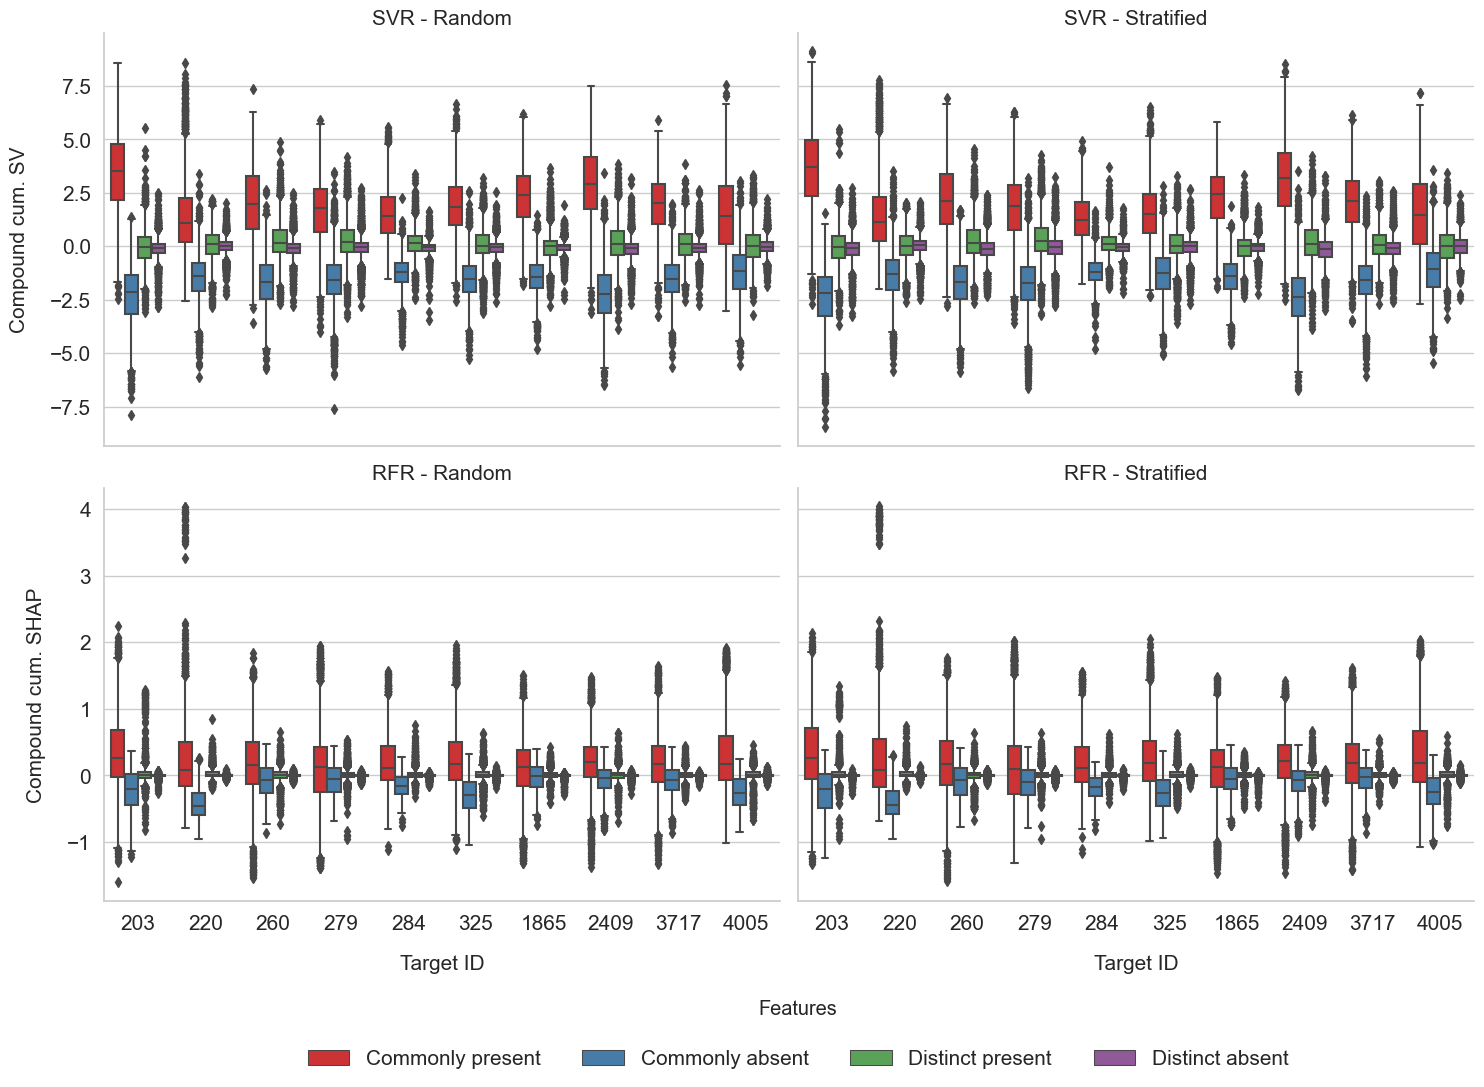

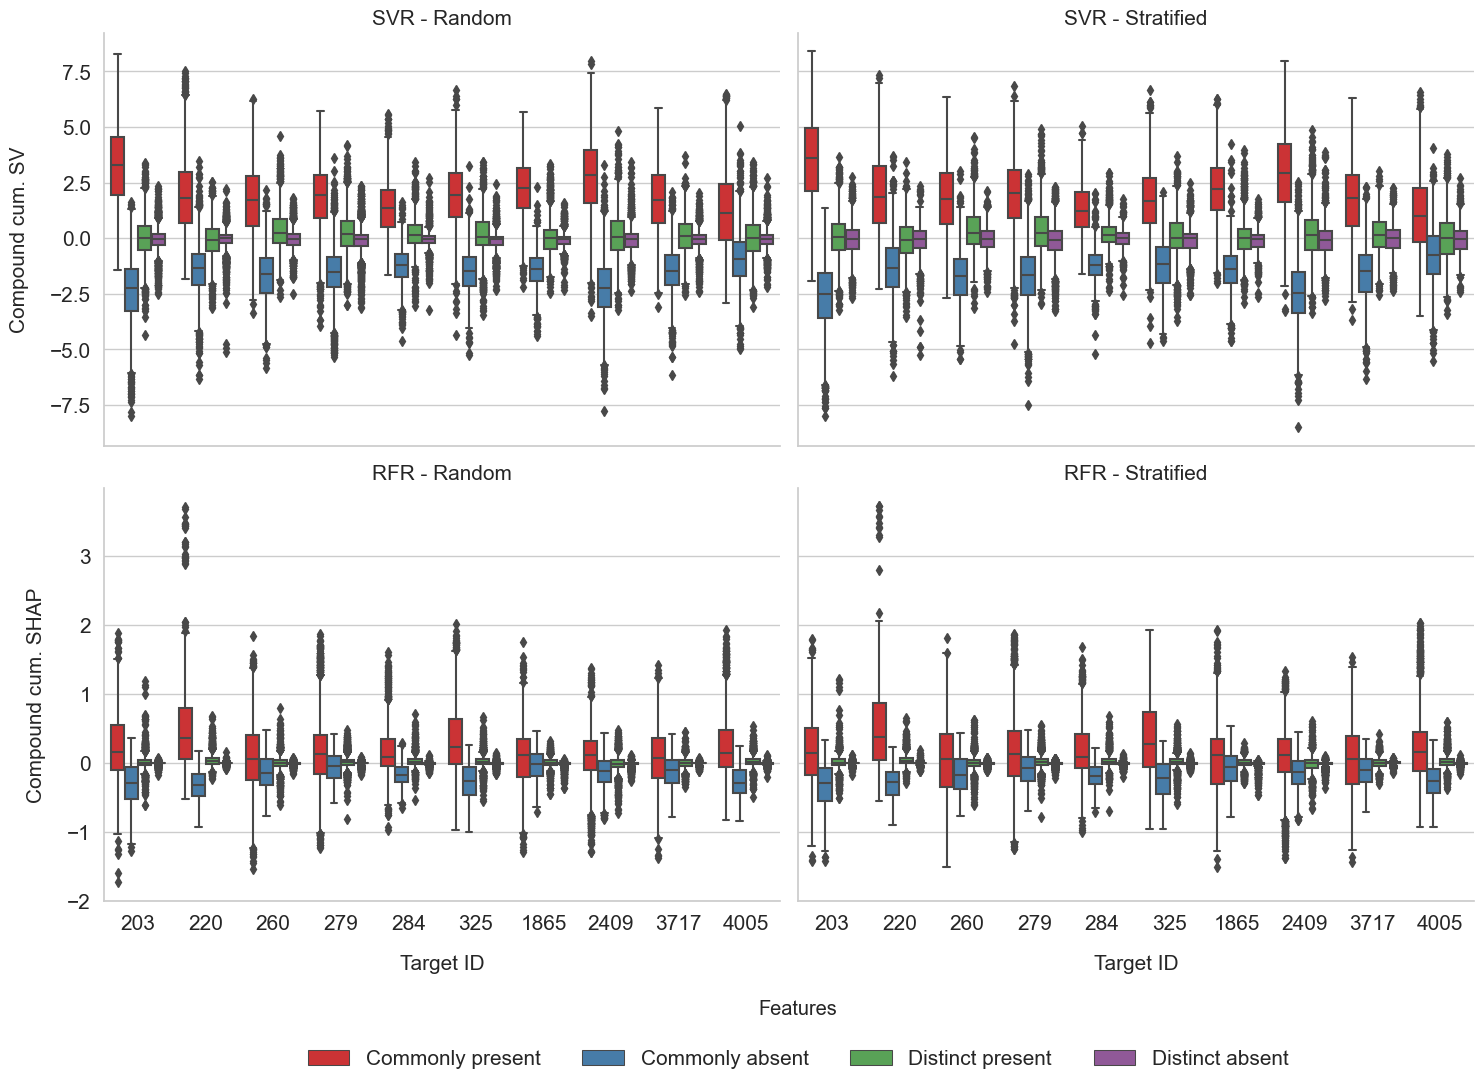

In [9]:
for fig in ['a', 'b']:
    if fig == 'a':
        df_mm_bits_test_fig = df_mm_bits_test.loc[df_mm_bits_test.residual <= 0.5]
    else:
        df_mm_bits_test_fig = df_mm_bits_test.loc[df_mm_bits_test.residual > 0.5]
        
    # plot
    font_size = 15
    
    g = sns.catplot(x="Target ID", y="Value", hue="bits", kind="box", data=df_mm_bits_test_fig, row='Algorithm', col='split',
                    sharey='row', height=5, aspect=1.5, hue_order=bit_col, legend=False, col_order=['Random', 'Stratified'], row_order=['SVR', 'RFR'],
                    palette='Set1')
    
    g.set_ylabels('Compound cum. SV', labelpad=15, fontsize=font_size)
    g.set_xlabels(f'Target ID', labelpad=15, fontsize=font_size)
    g.tick_params(labelsize=font_size)
    
    g.set_titles("{row_name} - {col_name}", size=font_size)
    import matplotlib.pyplot as plt
    
    plt.tight_layout()
    g.despine(right=True, top=True)
    legend = plt.legend(loc='lower center', bbox_to_anchor=(0.0, -0.45), ncol=4,  #, prop={'size': font_size-10}
                        frameon=False, title='Features', prop={'size': font_size}, labelspacing=1.5)
    plt.setp(legend.get_title(),fontsize='large')
    for ax0 in g.axes[1]:
        ax0.set(ylabel='Compound cum. SHAP')
    #plt.savefig('./figures/' + f'Fig5{fig}.png', dpi=300, bbox_inches="tight")
    plt.show()